# 線形回帰とOLS

## 単回帰モデル

次のようなモデルを考える

$$
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
$$

単回帰モデルの仮定：
えたなら. $(Y_i, X_i)$はi.i.d
2. $E[\epsilon_i|X_i] = 0$
3. $E[Y_i^4] < \infty, E[X_i^4] < \infty$

(1)の仮定は、標本が母集団から無作為抽出によって選ばれたならば満たされる。(2)は平均独立の仮定と呼ばれる。必ずしも独立の仮定は必要ではない。(3)はmoment存在条件。

### OLS推定量

$$
\min \sum_i^N (Y_i - b_0 - b_1X_i)^2
$$

Then, FOCより

$$
\begin{aligned}
\widehat\beta_{OLS} = (X'X)^{-1}(X'Y)
\end{aligned}
$$


### OLS推定量の性質

単回帰モデルの仮定の下、OLS推定量は以下の性質を満たす。

1. 不偏性：

$$
E[\widehat\beta_{OLS}] = \beta
$$

2. consistency : 

$$
\widehat\beta_{OLS} \xrightarrow{p} \beta_1
$$

3. asymptotic normal: 

$$
\sqrt{n}(\widehat\beta_{OLS} - \beta) \xrightarrow{d} N\left(0, \frac{Var[(X_i - E[X_i])u_i]}{Var(X_i)^2}\right)
$$

In [19]:
### PYTHON

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(9876789)

In [20]:
### making data
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [21]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [22]:
## 均一分散

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Sat, 07 Mar 2020   Prob (F-statistic):          2.83e-239
Time:                        13:25:43   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

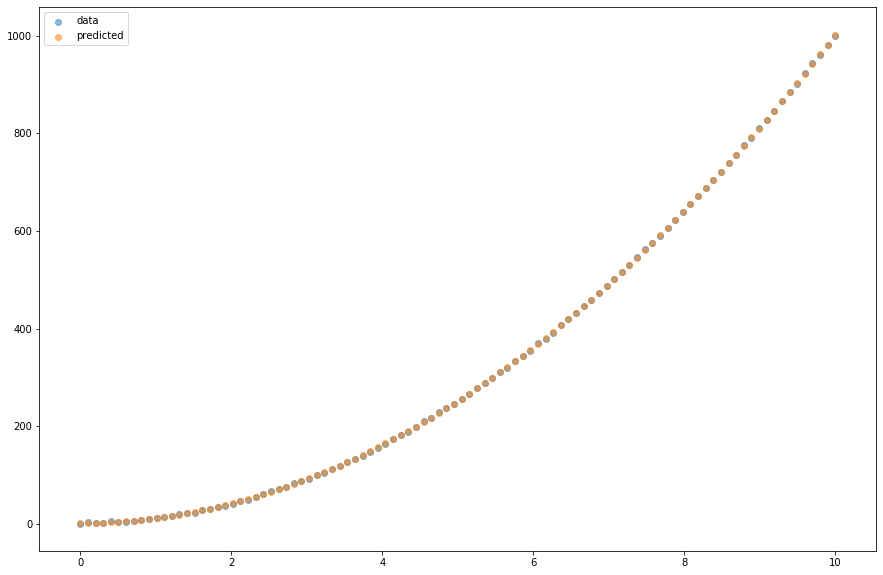

In [23]:
plt.figure(figsize = (15, 10))
plt.scatter(x, y, alpha = 0.5, label = 'data')
plt.scatter(x, results.predict(), alpha = 0.5, label = 'predicted')
plt.legend();